**Neural Network

This is a binary classification problem (high crime as 1 or not as 0). All of the input variables that describe each patient are numerical. This makes it easy to use directly with neural networks that expect numerical input and output values, and ideal for our first neural network in Keras.

There are 104? input variables and one output variable, violentcrimesperpop (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which is summarised as y = f(X).

/Users/emilybirch/CEGE0004/4-NeuralNet
      communityname state  countyCode  communityCode  fold  population  \
0    Marpletownship    PA        45.0        47616.0     1       23123   
1        Tigardcity    OR         NaN            NaN     1       29344   
2  Gloversvillecity    NY        35.0        29443.0     1       16656   
3       Bemidjicity    MN         7.0         5068.0     1       11245   
4   Springfieldcity    MO         NaN            NaN     1      140494   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  burglaries  \
0           2.82          0.80         95.57          3.44  ...        57.0   
1           2.43          0.74         94.33          3.43  ...       274.0   
2           2.40          1.70         97.35          0.50  ...       225.0   
3           2.76          0.53         89.16          1.17  ...        91.0   
4           2.45          2.51         95.65          0.90  ...      2094.0   

   burglPerPop  larcenies  larcPerPop  au

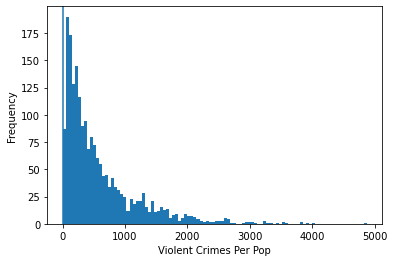

223.06     3
624.31     2
115.14     2
28.45      2
84.88      2
          ..
116.10     1
280.44     1
154.77     1
974.36     1
2089.32    1
Name: ViolentCrimesPerPop, Length: 1972, dtype: int64
variables    population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0       23123           2.82          0.80         95.57          3.44   
1       29344           2.43          0.74         94.33          3.43   
2       16656           2.40          1.70         97.35          0.50   
3       11245           2.76          0.53         89.16          1.17   
4      140494           2.45          2.51         95.65          0.90   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.85        11.01        21.30        10.48       17.18  ...   
1         2.35        11.36        25.88        11.01       10.28  ...   
2         0.70        12.55        25.20        12.19       17.57  ...   
3         0.52        24.46        40.53        28.6

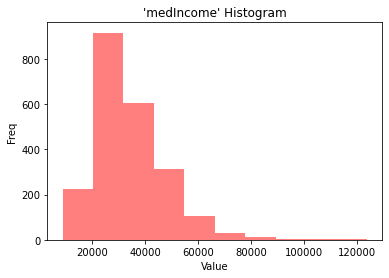

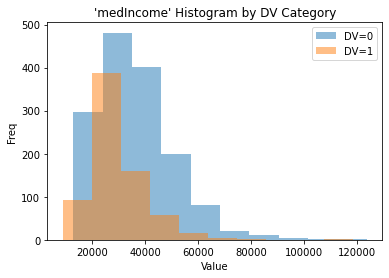

In [4]:
# run preprocessing
%pwd  #look at the current work dir
%cd /Users/emilybirch/CEGE0004/4-NeuralNet
%run Preprocessing.ipynb

In [5]:
#test if the data is correct
data.head() #ensiure that there is a crime binary indiactor at the end

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,murders,ViolentCrimesPerPop
0,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,0,0
1,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,3,0
2,16656,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,...,88.71,56.70,90.17,96.24,5.2,3217.7,3.31,0.0,0,0
3,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0,0,1
4,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0,7,0


In [ ]:
#import the required pacakages
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
data.shape

In [ ]:
data 

In [ ]:
# Now apply the transformations to the data:
X = data.iloc[:,0:103].values #normalize
y = data.iloc[:,103].values

In [ ]:

def create_baseline():
    #define model
    # create a sequential model and add layers one at a time
    # model will have a single fully connected hidden layer with the same number of neurons as input vairables
    model = Sequential()
    # relu activation func tends to achieve better results than sigmoid or tanh
    # output layer should be sigmoid to ensure network output is between 0-1 
    # and easy to snap to a hard classification of either clss w a default threshold value of 0.5
    # set the input_dim as the number of input features 
    # dense sets the number of nodes per that hidden layer
    # the first dense layer is both defining the input or visible layer and the first hidden layer.
    model.add(Dense(12, input_dim=103, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile model
    # loss function is specified here
    # in keras, the loss is for a binary classification problem 'binary_crossentropy'
    # optimiser defined as 'adam', the efficient stochastic gradient descent algorithm
    # because it is a binary classification problem, collect classification accuracy via metrics argument
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    return model

In [ ]:
# evaluate the model with standardized dataset.
# fit the keras model on the dataset
#model.fit(X, y, epochs=150, batch_size=10)


# set the number of eopchs = one pass through all rows in the training dataset
# set batch_size = one or more samples considered by model
# aim to train the model enough so it learns good enough mapping of rows of input daya to the output classification
estimator = KerasClassifier(build_fn=create_baseline, epochs=150, batch_size=10, verbose=0)
model.fit(X, y, epochs=150, batch_size=10)


# SHOULD K FOLD BE FIRST?
# K-fold cross validation technique
# is stratified so it will look at the ouput valies 
# and attempt to balance the number of instances that belong to each class in the k-splits of the data
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



# evaluate the keras model 
# Ideally, we would like the loss to go to zero and accuracy to go to 1.0 (e.g. 100%)
# The evaluate() function will return a list with two values. 
# The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset.
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# plot the model
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense(2, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)